# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 

In [ ]:
# reading in csv and looking at sample to make running it easier
df = pd.read_csv('data/pretrial_data.csv')
x_full = df['age'].dropna().to_numpy()
x = df['age'].dropna().sample(50, random_state=10).to_numpy() 

N = len(x) # number of observations

sd = np.std(x) # standard deviation of x
iqr = np.subtract(*np.percentile(x, [75,25]))
sigma = min(sd, iqr/1.34) if iqr > 0 else sd
h = 1.06 * sigma * N**(-1/5) #Silverman 
h_s = h

med_x = np.median(x) # median of x
min_x = min(x) # min of x
max_x = max(x) # max of x

M = 500 # steps for grid
grid = np.linspace(min_x-2*sd,max_x+2*sd,M)

In [66]:
# Kernel types
def gaussianK(z):
    density = np.exp(-0.5 * z**2) / np.sqrt(2*np.pi)
    return density

def uniformK(z):
    density = (z <= 1).astype(float) * 0.5
    return density
    
def epanechnikovK(z):
    density = np.where(z <= 1, 0.75*(1 - z**2), 0.0)
    return density

# setting gaussian as default
K = gaussianK

In [71]:
dist = cdist(x_full[:, None], grid[:,None], metric = 'euclidean')
T = dist / h # standardized distance
kde = K(T).sum(axis=0) / (N * h) # getting average and scaling 


[Text(0.5, 1.0, 'Our Kernel Density Plot'),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, '$\\hat{f}(x)$')]

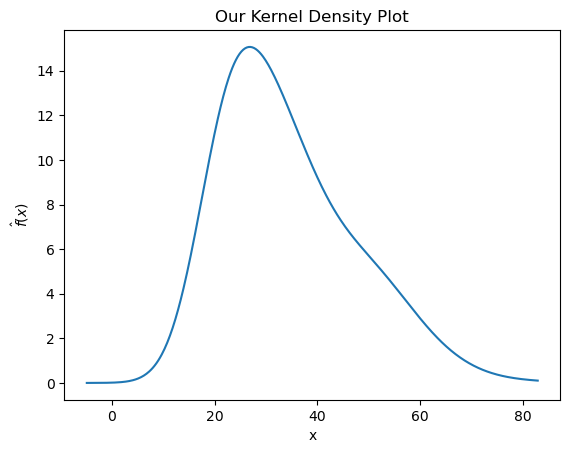

In [75]:
createdKDP = sns.lineplot(x=grid, y=kde)
createdKDP.set(title="Our Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

[Text(0.5, 1.0, "Seaborn's Kernel Density Plot"),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, '$\\hat{f}(x)$')]

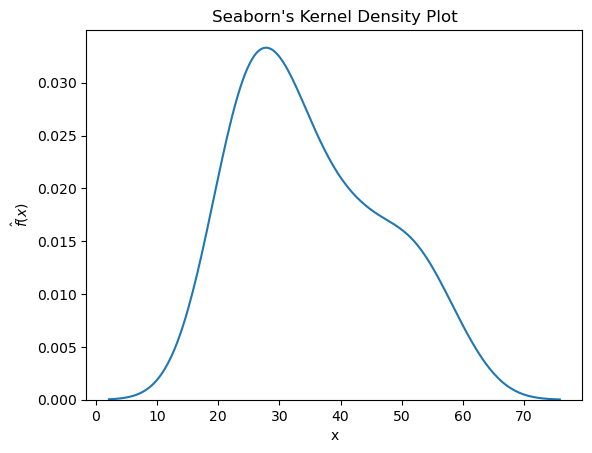

In [76]:
fig = sns.kdeplot(x) # Seaborn's KDE estimator
fig.set(title="Seaborn's Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

In [ ]:
# turning above into funtion
def kdeplot(
    csv_path='data/pretrial_data.csv',
    column='age',
    kernel='gaussian',           # gaussian, uniform, epanechnikov
    bandwidth='silverman',       
    gridsize=500,                # M
):
    # loading and cleaning data
    df = pd.read_csv(csv_path)
    x = df[column].dropna().to_numpy(float)
    N = x.size

    # bandwidth
    sd = np.std(x) # standard deviation of x
    iqr = np.subtract(*np.percentile(x, [75,25]))
    if bandwidth == 'silverman':
        sigma = min(sd, iqr/1.34) if iqr > 0 else sd
        h = 1.06 * sigma * N**(-1/5) #Silverman 
        h_s = h
    else:
        h = float(bandwidth)
        h_s = h
    
    #grid
    min_x = min(x) # min of x
    max_x = max(x) # max of x

    grid = np.linspace(min_x-2*sd,max_x+2*sd, int(gridsize))

    # kernels 

    def k(z):
        if kernel == "gaussian":
            density = np.exp(-0.5 * z**2) / np.sqrt(2*np.pi)
            return density
        if kernel == "uniform":
            density = (z <= 1).astype(float) * 0.5
            return density
        if kernel == "epanechnikov":
            density = np.where(z <= 1, 0.75*(1 - z**2), 0.0)
            return density
        else: 
            return "Error"
    
    # Distance
    dist = cdist(x[:, None], grid[:,None], metric = 'euclidean')
    T = dist / h # standardized distance
    kde = K(T).sum(axis=0) / (N * h) # getting average and scaling 

    # plot
    plot = sns.lineplot(x=grid, y=kde)
    plot.set(title="Our Kernel Density Plot", xlabel='x', ylabel='density')

    return grid, kde, h, plot
    
   

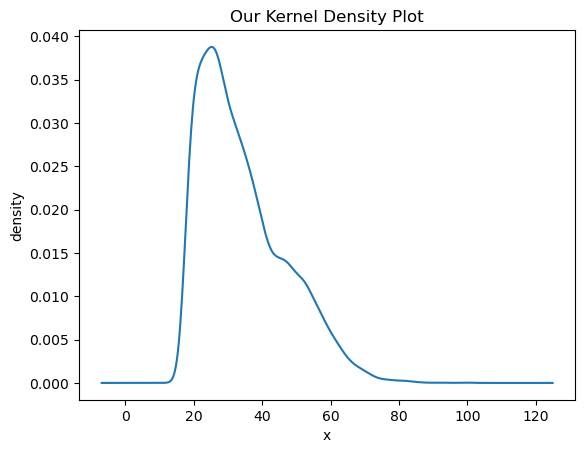

In [ ]:
grid, kde, h, ax = kdeplot()   # uses default file path, age, gaussian, and silverman
plt.show()

[Text(0.5, 1.0, "Seaborn's Kernel Density Plot"),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, '$\\hat{f}(x)$')]

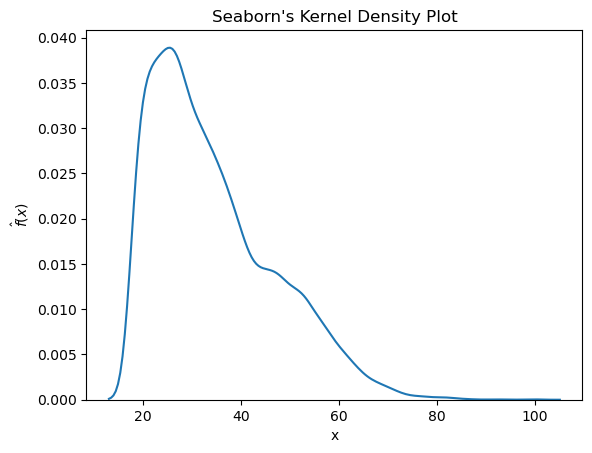

In [85]:
fig = sns.kdeplot(x_full) # Seaborn's KDE estimator
fig.set(title="Seaborn's Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

The shape between my function Kernel density plot and Seaborn's is pretty similar with large peak around 25. The range of the graphs are differnt where mine goes to but Seaborn stops at 100.  

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [5]:
collegeData = pd.read_csv("data/college_completion.csv")

In [15]:
collegeData.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. There are 3798 rows and 63 columns in the data. The variables include extensive data about different colleges, including location, degrees offer, transfer rate, student count, state awards, SAT percentiles, graduation rate, and more. However we will be focusing on the institution level, average financial aid, control (public or private), and graduation rate of undergrads in 4 year. 

In [16]:
pd.crosstab(collegeData['control'], collegeData['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


3. The majority of 4 year degrees come from colleges that are private not-for-profit while public colleges make up the majority of 2-year degrees. There is roughly an even number of colleges that are private for-profit that provide 2 and 4 year educations. The combination of 2-year education and private not-for-profit colleges make up the smallest part of the sample at only 68 schools. 

In [18]:
grad100 = collegeData["grad_100_value"]

<Axes: xlabel='grad_100_value', ylabel='Count'>

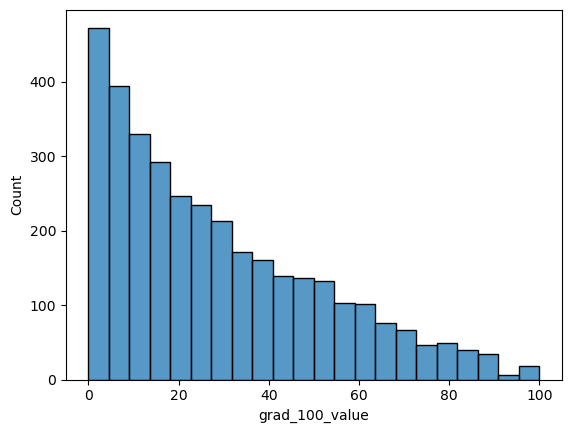

In [20]:
sns.histplot(grad100)

<Axes: xlabel='grad_100_value', ylabel='Density'>

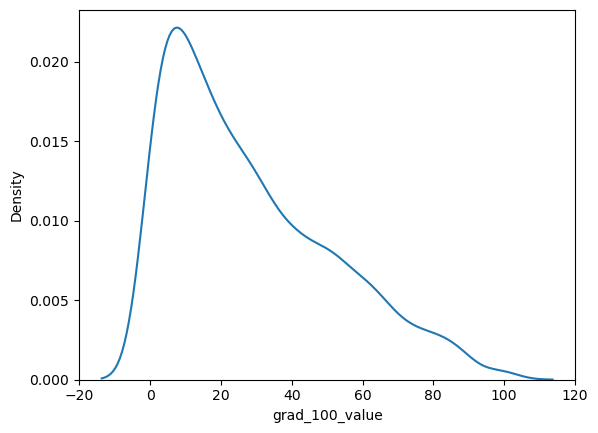

In [19]:
sns.kdeplot(grad100)

<Axes: ylabel='grad_100_value'>

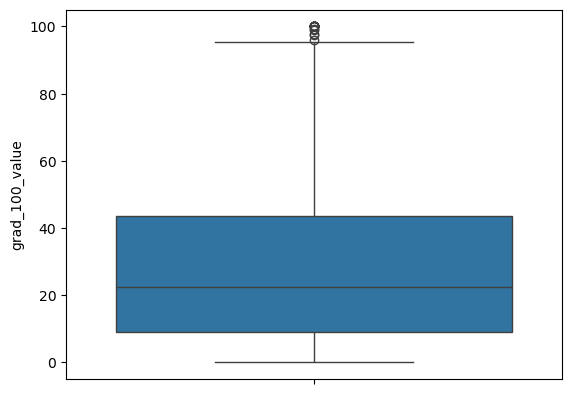

In [21]:
sns.boxplot(grad100)

In [22]:
grad100.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

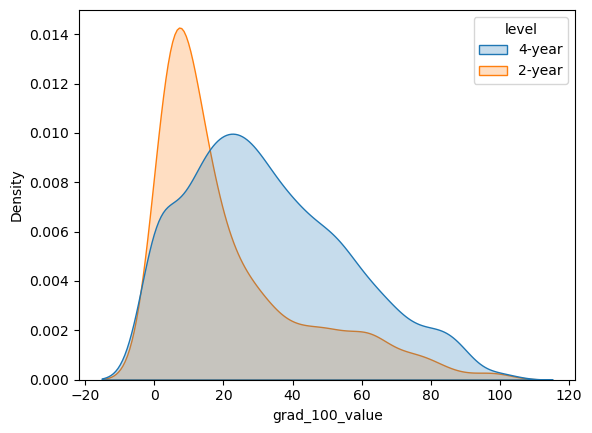

In [33]:
sns.kdeplot(
    data=collegeData,
    x="grad_100_value",
    hue="level",
    multiple="layer",
    fill=True
)


<Axes: xlabel='grad_100_value', ylabel='Density'>

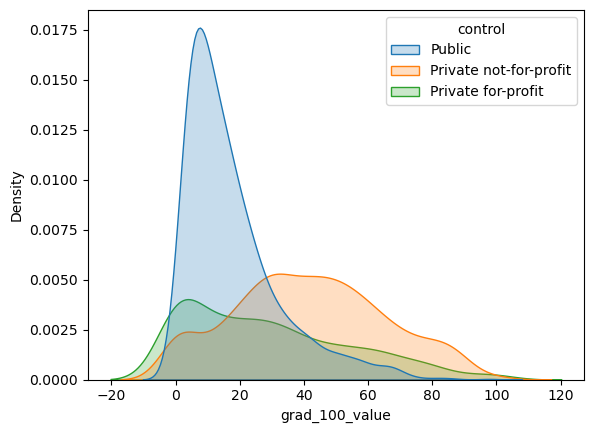

In [35]:
sns.kdeplot(
    data=collegeData,
    x="grad_100_value",
    hue="control",
    multiple="layer",
    fill=True
)

In [37]:
collegeData.groupby(["control","level"])["grad_100_value"].describe()


count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                       4-year  21.8  33.800   86.3

5. The KDE plot by level shows that 4-year institutions have higher graduation rates than 2-year institutions. Most 4-year schools fall below 50% with a slight right skew, while 2-year schools are heavily right-skewed, with most clustered around 10%. By control, public institutions resemble the 2-year pattern, likely because they make up about 63% of 2-year schools. Private institutions are more varied as private not-for-profit schools follow a roughly normal distribution, while private for-profit schools are right-skewed with many low graduation rates. Summary statistics confirm that private not-for-profit institutions have the highest average graduation rate (41.9%), though based on fewer schools and greater variation. Private for-profit schools follow closely at 41.6% with the largest sample size, making their estimate more reliable. Overall, private not-for-profit institutions appear to achieve the best graduation outcomes.

In [39]:
collegeData['levelXcontrol']=collegeData['level']+collegeData['control']

<Axes: xlabel='grad_100_value', ylabel='Density'>

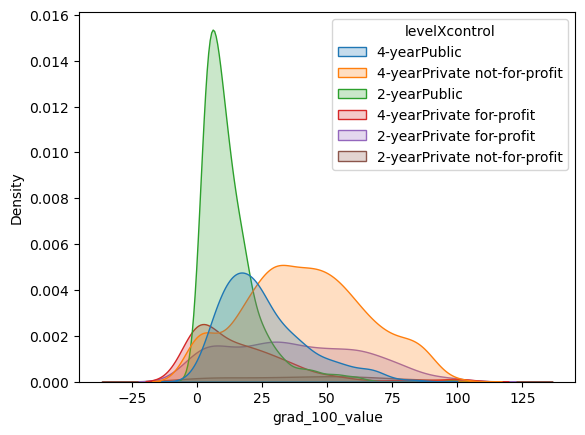

In [43]:
sns.kdeplot(
    data=collegeData,
    x="grad_100_value",
    hue="levelXcontrol",
    fill=True
)

6. Based on the level X control KDP, it seems that 4 year private not for profit institutions have the best graduation rates. 

<Axes: xlabel='aid_value', ylabel='Density'>

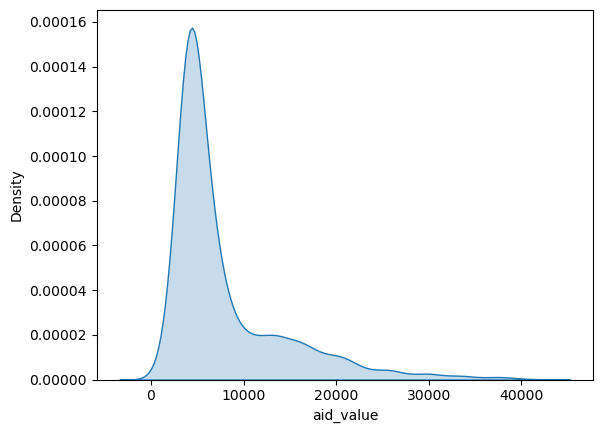

In [46]:
sns.kdeplot(
    data=collegeData,
    x = 'aid_value',
    fill=True
)

<Axes: xlabel='aid_value', ylabel='Density'>

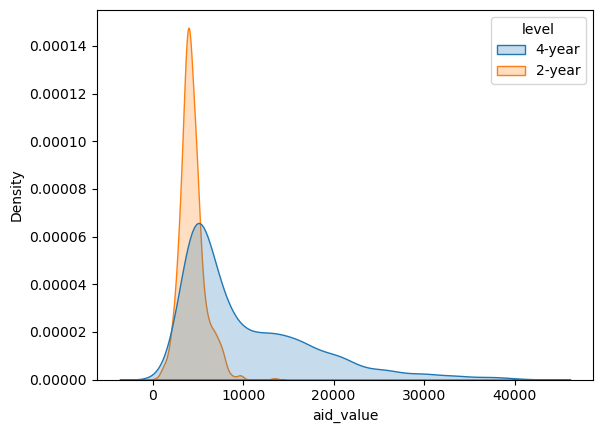

In [48]:
sns.kdeplot(
    data=collegeData,
    x = 'aid_value',
    hue='level',
    fill=True
)

<Axes: xlabel='aid_value', ylabel='Density'>

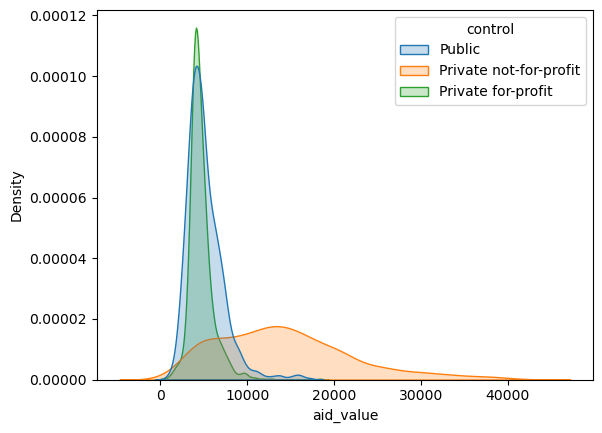

In [49]:
sns.kdeplot(
    data=collegeData,
    x = 'aid_value',
    hue='control',
    fill=True
)

In [50]:
collegeData.groupby(["control","level"])["aid_value"].describe()


count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.5  18996.75  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  4990.50   6085.0   7341.50  17299.0

Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

7. The KDE plot by level shows that 2-year institutions cluster heavily around $5,000, while 4-year institutions are more spread out and slightly right-skewed. This pattern likely reflects the higher cost of attending a 4-year school. Looking at the KDE plot by control, public and private for-profit schools largely overlap, with most observations centered around $5,000. These institutions likely have less capacity to provide substantial aid. In contrast, private not-for-profit schools are much more spread out, with a heavy right tail, and the average financial aid is about $13,000. The grouped statistics confirm these patterns. Private not-for-profit 4-year institutions provide the most financial aid on average at $14,702, followed by public 4-year schools at $6,514. Private for-profit 2-year schools provide the least at $4,559. Among 2-year schools, private not-for-profit institutions give more aid than public or for-profit schools, though the sample size is small and the variation is large. Overall, private not-for-profit 4-year institutions offer the most generous financial aid, both in magnitude and variability.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

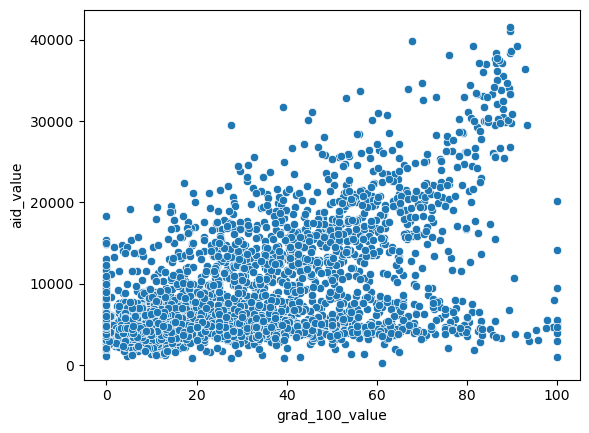

In [51]:
sns.scatterplot(x=collegeData['grad_100_value'], y = collegeData['aid_value'])

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

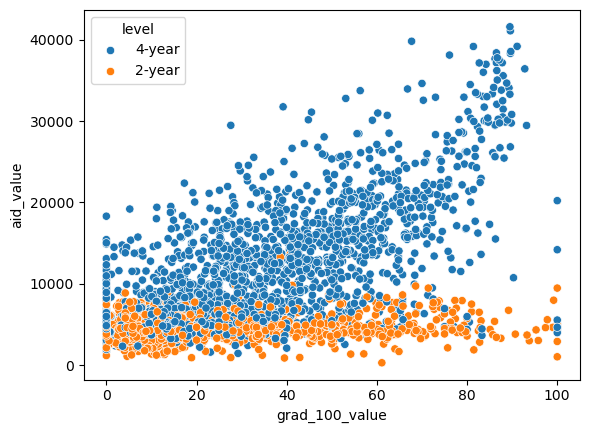

In [52]:
sns.scatterplot(x=collegeData['grad_100_value'], 
                y = collegeData['aid_value'],
                hue = collegeData['level'])

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

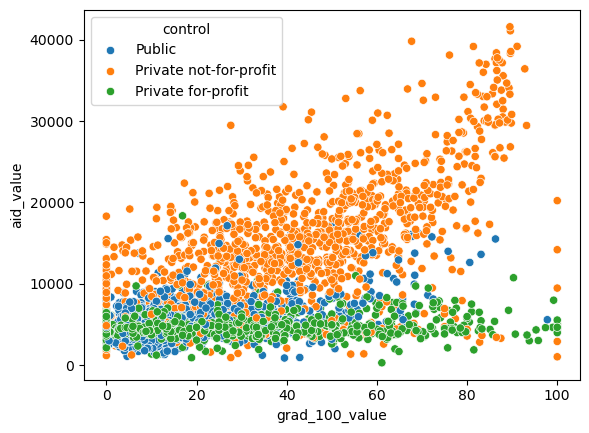

In [53]:
sns.scatterplot(x=collegeData['grad_100_value'], 
                y = collegeData['aid_value'],
                hue = collegeData['control'])

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

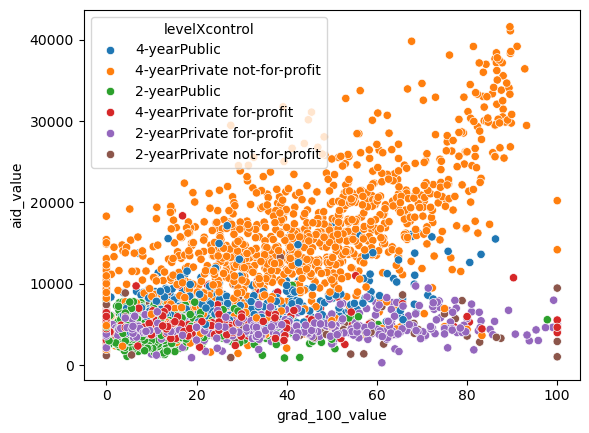

In [55]:
sns.scatterplot(x=collegeData['grad_100_value'], 
                y = collegeData['aid_value'],
                hue = collegeData['levelXcontrol'])

8. In the scatterplot separated by level, 2-year institutions show an almost flat slope, indicating that graduation rate does not change noticeably with aid value. In contrast, 4-year institutions display a positive slope, suggesting that graduation rates tend to increase as aid value rises. Looking at the scatterplot by control, both public and private for-profit schools show nearly flat slopes, while private not-for-profit schools exhibit a positive relationship between aid and graduation rate. Overall, it appears that graduation rates increase with aid primarily for 4-year private not-for-profit institutions.

Sources
Used ChatGPT to help with cdist and turning code blocks into a funtion. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
